In [9]:
# load training data
import pandas as pd
print 'Loading trainig data'
train_data = pd.read_csv('l_train.csv')
print "finished"

Loading trainig data
finished


In [49]:
X = train_data.iloc[:,1:32]
y = train_data['Label']
print y.head()
X.head(5)

0    s
1    b
2    b
3    b
4    b
Name: Label, dtype: object


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333


In [4]:
import numpy as np
# display each column's data type
# so we can detect inconsistencies
print "---- Data types by feature ----"
columns =  X.columns
for column in columns:
    vals = [type(val) for val in X[column].unique()]
    print 'feature: {}, types: {}'.format(column, np.unique(vals))

---- Data types by feature ----
feature: DER_mass_MMC, types: [<type 'numpy.float64'>]
feature: DER_mass_transverse_met_lep, types: [<type 'numpy.float64'>]
feature: DER_mass_vis, types: [<type 'numpy.float64'>]
feature: DER_pt_h, types: [<type 'numpy.float64'>]
feature: DER_deltaeta_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_mass_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_prodeta_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_deltar_tau_lep, types: [<type 'numpy.float64'>]
feature: DER_pt_tot, types: [<type 'numpy.float64'>]
feature: DER_sum_pt, types: [<type 'numpy.float64'>]
feature: DER_pt_ratio_lep_tau, types: [<type 'numpy.float64'>]
feature: DER_met_phi_centrality, types: [<type 'numpy.float64'>]
feature: DER_lep_eta_centrality, types: [<type 'numpy.float64'>]
feature: PRI_tau_pt, types: [<type 'numpy.float64'>]
feature: PRI_tau_eta, types: [<type 'numpy.float64'>]
feature: PRI_tau_phi, types: [<type 'numpy.float64'>]
feature: PRI_lep_pt, types: [<ty

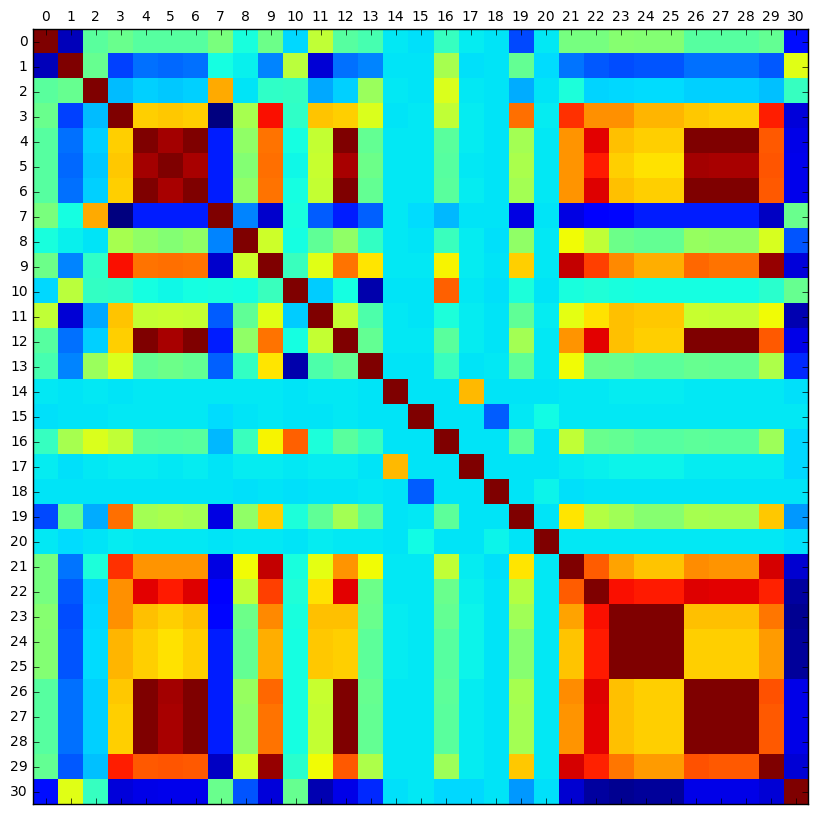

In [5]:
# first I want to see what correlations exist within features
import matplotlib.pyplot as plt

# change feature names for numbers
# so we can visualize it better
def names_to_nums(df_in):
    df = df_in.copy()
    df.columns = [i for i in range(0, len(df.columns))]
    return df
# print correlation matrix
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
X_nums = names_to_nums(X)
plot_corr(X_nums)

In [6]:
# print list of values so we can see which correspond to which index
print [(pos, val) for pos, val in enumerate(X.columns.values)]

[(0, 'DER_mass_MMC'), (1, 'DER_mass_transverse_met_lep'), (2, 'DER_mass_vis'), (3, 'DER_pt_h'), (4, 'DER_deltaeta_jet_jet'), (5, 'DER_mass_jet_jet'), (6, 'DER_prodeta_jet_jet'), (7, 'DER_deltar_tau_lep'), (8, 'DER_pt_tot'), (9, 'DER_sum_pt'), (10, 'DER_pt_ratio_lep_tau'), (11, 'DER_met_phi_centrality'), (12, 'DER_lep_eta_centrality'), (13, 'PRI_tau_pt'), (14, 'PRI_tau_eta'), (15, 'PRI_tau_phi'), (16, 'PRI_lep_pt'), (17, 'PRI_lep_eta'), (18, 'PRI_lep_phi'), (19, 'PRI_met'), (20, 'PRI_met_phi'), (21, 'PRI_met_sumet'), (22, 'PRI_jet_num'), (23, 'PRI_jet_leading_pt'), (24, 'PRI_jet_leading_eta'), (25, 'PRI_jet_leading_phi'), (26, 'PRI_jet_subleading_pt'), (27, 'PRI_jet_subleading_eta'), (28, 'PRI_jet_subleading_phi'), (29, 'PRI_jet_all_pt'), (30, 'Weight')]


In [31]:
# deal with incorrect values later

In [7]:
corr_tups = []
# make a numerical visualization of the correlations
for column in X.columns:
    corr = X.corr()[column]
    corr_dict = corr.to_dict()
    del corr_dict[column]
    max_key = max(corr_dict, key=lambda k: corr_dict[k])
    pair = (column, max_key, corr_dict[max_key])
    corr_tups.append(pair)
    print '{} with {}, value: {}'.format(column, max_key, corr_dict[max_key])

DER_mass_MMC with DER_met_phi_centrality, value: 0.358962714301
DER_mass_transverse_met_lep with Weight, value: 0.41984342625
DER_mass_vis with DER_deltar_tau_lep, value: 0.579711616621
DER_pt_h with DER_sum_pt, value: 0.832733066633
DER_deltaeta_jet_jet with DER_lep_eta_centrality, value: 0.999998385715
DER_mass_jet_jet with PRI_jet_subleading_pt, value: 0.94765180638
DER_prodeta_jet_jet with DER_lep_eta_centrality, value: 0.999989674692
DER_deltar_tau_lep with DER_mass_vis, value: 0.579711616621
DER_pt_tot with PRI_met_sumet, value: 0.448925313766
DER_sum_pt with PRI_jet_all_pt, value: 0.965628388917
DER_pt_ratio_lep_tau with PRI_lep_pt, value: 0.701142220585
DER_met_phi_centrality with PRI_jet_leading_pt, value: 0.548612552356
DER_lep_eta_centrality with DER_deltaeta_jet_jet, value: 0.999998385715
PRI_tau_pt with DER_sum_pt, value: 0.485847265569
PRI_tau_eta with PRI_lep_eta, value: 0.557086147226
PRI_tau_phi with PRI_met_phi, value: 0.0329229819913
PRI_lep_pt with DER_pt_ratio_lep_

In [8]:
# get only features that have more than 0.90 correlation
min_corr = 0.95
corr_tups = filter(lambda tup: tup[2] > min_corr, corr_tups)

# remove symetric duplicates
corr_vals = []
_ = [
    corr_vals.append((a,b,c)) for a,b,c in corr_tups
    if (b,a,c) not in corr_vals
]
corr_vals

[('DER_deltaeta_jet_jet', 'DER_lep_eta_centrality', 0.99999838571508559),
 ('DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 0.9999896746922442),
 ('DER_sum_pt', 'PRI_jet_all_pt', 0.96562838891691405),
 ('PRI_jet_leading_pt', 'PRI_jet_leading_eta', 0.99610001226022604),
 ('PRI_jet_leading_eta', 'PRI_jet_leading_phi', 0.99999183689272975),
 ('PRI_jet_subleading_pt', 'DER_lep_eta_centrality', 0.99935463118318435),
 ('PRI_jet_subleading_eta', 'DER_lep_eta_centrality', 0.99999697598278958),
 ('PRI_jet_subleading_phi', 'DER_lep_eta_centrality', 0.99999755657338452)]

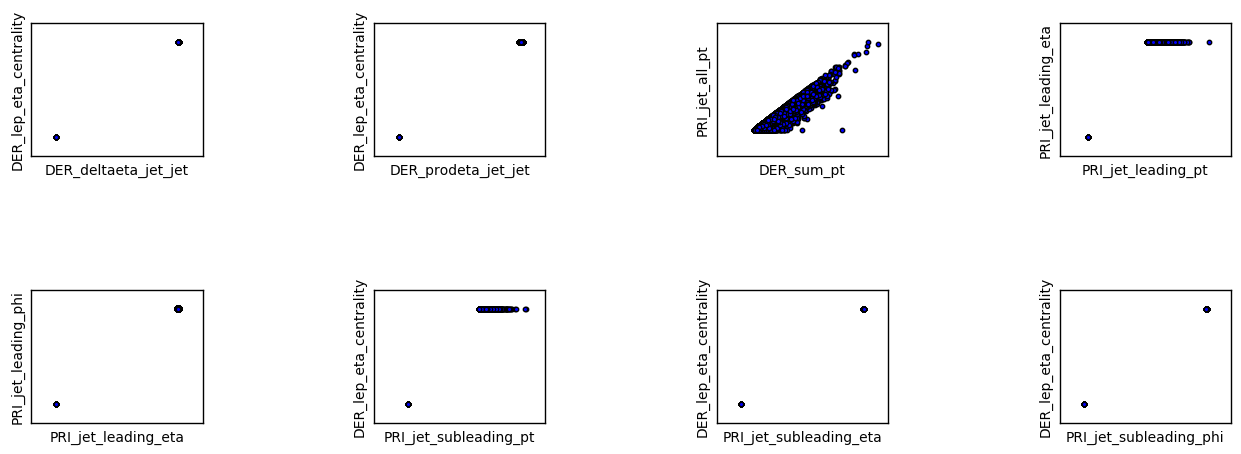

In [103]:
# plot some correlated features
subs = 0
for col1, col2, _ in corr_vals:
    subs = subs + 1
    plt.subplot(2,4,subs)
    plt.scatter(X[col1], X[col2], s=10, marker="o")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.xticks([])
    plt.yticks([])
    
plt.subplots_adjust(left=1, bottom=2, right=3, top=3, wspace=1, hspace=1)
plt.show()

In [52]:
# print columns with more than n% nan values (or in this case -999)
print len(X.columns)
n = 0.7 # mora than 70% invalid values
for column in X.columns:
    vals = pd.value_counts(X[column].values, sort=True)
    nan = vals.iloc[0] * 1.0 / len(X[column])
    if nan > n:
        X = X.drop(column, axis=1)
    else:
        X[column] = X[column].replace(-999.0, X[column].mean())
# the correlations above were caused by the nan values
print len(X.columns)
X.head()

24
24


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
0,138.470000,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,-2.414,16.824,-0.277,258.733,2,67.435000,2.150000,0.444000,113.497,0.002653
1,160.937000,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,0.103,44.704,-1.916,164.546,1,46.226000,0.725000,1.158000,46.226,2.233584
2,-49.023079,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,1.052,54.283,-2.186,260.414,1,44.251000,2.053000,-2.028000,44.251,2.347389
3,143.905000,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,-3.100,31.082,0.060,86.062,0,-348.329567,-399.254314,-399.259788,-0.000,5.446378
4,175.864000,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,1.569,2.723,-0.871,53.131,0,-348.329567,-399.254314,-399.259788,0.000,6.245333


In [67]:
# SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # for classification tasks

X_new = SelectKBest(f_classif, k=15).fit_transform(X, y)

In [68]:
# get names of the k most important features by looking at the first value of the X_new columns
feature_names = [name for name in X.columns if X[name].values[0] in X_new[0]]
print feature_names

['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_pt_h', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_all_pt', 'Weight']


Feature ranking:
1. feature 23 (0.626322)
2. feature 0 (0.049327)
3. feature 8 (0.041695)
4. feature 1 (0.029388)
5. feature 2 (0.029039)
6. feature 4 (0.026012)
7. feature 9 (0.018522)
8. feature 7 (0.016797)
9. feature 18 (0.015175)
10. feature 20 (0.014307)
11. feature 15 (0.012878)
12. feature 3 (0.012368)
13. feature 5 (0.011747)
14. feature 6 (0.011512)
15. feature 21 (0.010953)
16. feature 13 (0.010320)
17. feature 12 (0.009201)
18. feature 17 (0.009188)
19. feature 10 (0.008952)
20. feature 22 (0.008494)
21. feature 19 (0.008477)
22. feature 14 (0.006512)
23. feature 16 (0.006433)
24. feature 11 (0.006380)


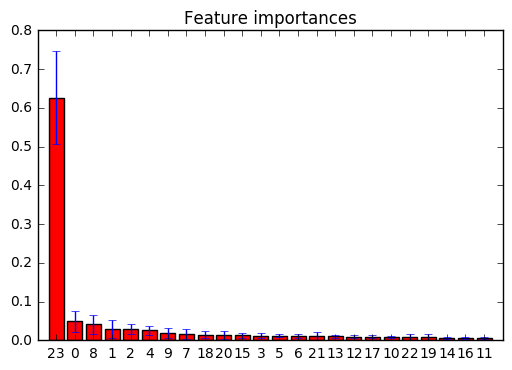

In [55]:
# plot feature importances using random trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [69]:
X.columns[23]

'Weight'

In [71]:
# create a new feature based on the mos correlated two featues
from sklearn.decomposition import PCA
X_aux = pd.DataFrame()
X_aux['DER_sum_pt'] = X['DER_sum_pt']
X_aux['PRI_jet_all_pt'] = X['PRI_jet_all_pt']

pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X_aux)

X_new = pca.transform(X_aux)
new_name = str('DER_sum_pt') + '-' + str('PRI_jet_all_pt')
X[new_name] = X_new
X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight,DER_sum_pt-PRI_jet_all_pt
0,138.470000,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,16.824,-0.277,258.733,2,67.435000,2.150000,0.444000,113.497,0.002653,56.126426
1,160.937000,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,44.704,-1.916,164.546,1,46.226000,0.725000,1.158000,46.226,2.233584,-42.740249
2,-49.023079,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,54.283,-2.186,260.414,1,44.251000,2.053000,-2.028000,44.251,2.347389,11.561966
3,143.905000,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,31.082,0.060,86.062,0,-348.329567,-399.254314,-399.259788,-0.000,5.446378,-110.141420
4,175.864000,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,2.723,-0.871,53.131,0,-348.329567,-399.254314,-399.259788,0.000,6.245333,-123.897923


In [94]:
# the new feature managed to be at the top 15 best features (try with this current X)
X_new = SelectKBest(f_classif, k=12).fit_transform(X, y)
feature_names = [name for name in X.columns if X[name].values[0] in X_new[0]]
print feature_names

['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_pt_h', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'DER_sum_pt-PRI_jet_all_pt', 'Weight']


In [100]:
for column in X.columns:
    if column not in feature_names:
        X = X.drop(column, axis=1)
        
X.columns

Index([u'DER_mass_MMC', u'DER_mass_transverse_met_lep', u'DER_pt_h',
       u'DER_sum_pt', u'DER_pt_ratio_lep_tau', u'DER_met_phi_centrality',
       u'PRI_tau_pt', u'PRI_jet_leading_pt', u'PRI_jet_leading_eta',
       u'PRI_jet_leading_phi', u'DER_sum_pt-PRI_jet_all_pt', u'Weight'],
      dtype='object')

Feature ranking:
1. feature 11 (0.764039)
2. feature 0 (0.064140)
3. feature 5 (0.041113)
4. feature 1 (0.029819)
5. feature 6 (0.017706)
6. feature 8 (0.015046)
7. feature 4 (0.014325)
8. feature 10 (0.012797)
9. feature 9 (0.012158)
10. feature 3 (0.010981)
11. feature 2 (0.010270)
12. feature 7 (0.007606)


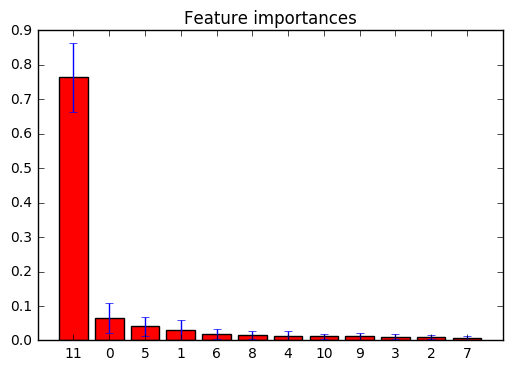

In [101]:
# plot feature importances using random trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()